In [ ]:
%matplotlib inline

In [3]:
"""
Script python pour ouvrir les fichiers de traces de clavier

"""
import matplotlib.pyplot as plt
import numpy as np
import time

def read_int(f):
    ba = bytearray(4)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.int32)
    return prm[0]

def read_double(f):
    ba = bytearray(8)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.double)
    return prm[0]

def read_double_tab(f, n):
    ba = bytearray(8*n)
    nr = f.readinto(ba)
    if nr != len(ba):
        return []
    else:
        prm = np.frombuffer(ba, dtype=np.double)
        return prm

def get_pics_from_file(filename):
    # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
    print("Ouverture du fichier de pics "+filename)
    f_pic = open(filename, "rb")
    info = dict()
    info["nb_pics"] = read_int(f_pic)
    print("Nb pics par trame: " + str(info["nb_pics"]))
    info["freq_sampling_khz"] = read_double(f_pic)
    print("Frequence d'echantillonnage: " + str(info["freq_sampling_khz"]) + " kHz")
    info["freq_trame_hz"] = read_double(f_pic)
    print("Frequence trame: " + str(info["freq_trame_hz"]) + " Hz")
    info["freq_pic_khz"] = read_double(f_pic)
    print("Frequence pic: " + str(info["freq_pic_khz"]) + " kHz")
    info["norm_fact"] = read_double(f_pic)
    print("Facteur de normalisation: " + str(info["norm_fact"]))
    tab_pics = []
    pics = read_double_tab(f_pic, info["nb_pics"])
    nb_trames = 1
    while len(pics) > 0:
        nb_trames = nb_trames+1
        tab_pics.append(pics)
        pics = read_double_tab(f_pic, info["nb_pics"])
    print("Nb trames: " + str(nb_trames))
    f_pic.close()
    return tab_pics, info
  
def get_pics_from_file2(filename):
  # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
  f_pic = open(filename, "rb")
  info = dict()
  info["nb_pics"] = read_int(f_pic)
  info["freq_sampling_khz"] = read_double(f_pic)
  info["freq_trame_hz"] = read_double(f_pic)
  info["freq_pic_khz"] = read_double(f_pic)
  info["norm_fact"] = read_double(f_pic)
  tab_pics = []
  pics = read_double_tab(f_pic, info["nb_pics"])
  nb_trames = 1
  while len(pics) > 0:
    nb_trames = nb_trames+1
    tab_pics.append(pics)
    pics = read_double_tab(f_pic, info["nb_pics"])
  f_pic.close()
  return tab_pics, info

In [5]:
# Expressing signals in terms of time to do a fourier transform.
pics_M, info = get_pics_from_file("data/pics_M.bin")

f_s = int(info["freq_pic_khz"]) * 1000  # Sampling rate, or number of measurements per second
t = np.linspace(0, 17 * (1 / f_s), 17, endpoint=False) # Array representing time

def get_signal(pics, t, i):
  x = pics[i]
  fig, ax = plt.subplots()
  ax.plot(t, x)
  ax.set_xlabel('Time [s]')
  ax.set_ylabel('Signal amplitude')
  return x

Ouverture du fichier de pics data/pics_M.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8055


In [6]:
from scipy import fftpack

def apply_fourier(x, f_s, show):
  X = fftpack.fft(x)
  freqs = fftpack.fftfreq(len(x)) * f_s
  abso = np.abs(X)
  abso[0] = 0

  if show:
    fig, ax = plt.subplots()
    abso = np.abs(X)
    ax.stem(freqs, abso)
    ax.set_xlabel('Frequency in Hertz [Hz]')
    ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
    ax.set_xlim(-f_s / 2, f_s / 2)
    ax.set_ylim(-5, 10)
    plt.show()

  return abso[freqs >= 0]

Ouverture du fichier de pics data/pics_J.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7793
Ouverture du fichier de pics data/pics_Q.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7577


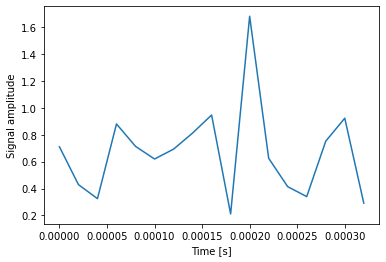

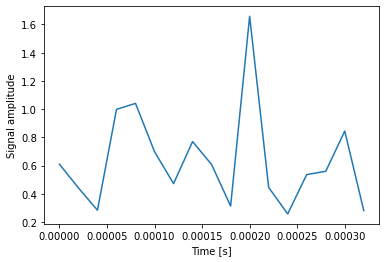

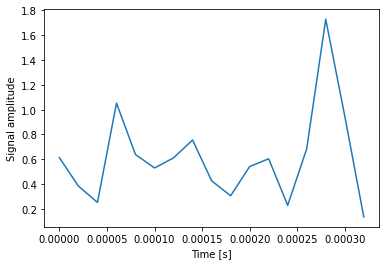

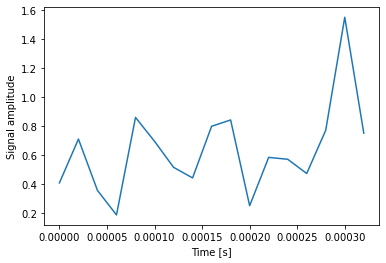

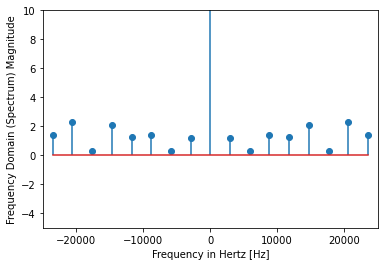

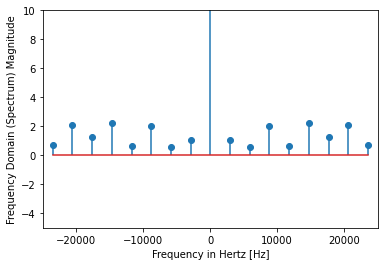

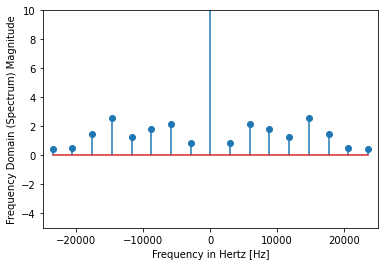

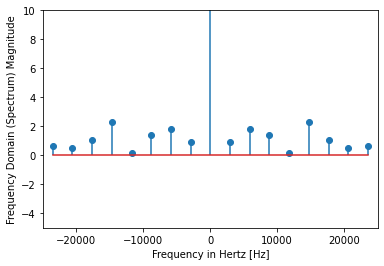

array([10.79101562,  0.953256  ,  1.78328555,  1.41968846,  0.13472903,
        2.31175637,  1.04489131,  0.53642283,  0.65539445])

In [7]:
# Printing some signals and their fourier transform

pics_J, info = get_pics_from_file("data/pics_J.bin")
pics_Q, info = get_pics_from_file("data/pics_Q.bin")

xJ = get_signal(pics_J, t, 0)
xJ2 = get_signal(pics_J, t, 100)
xJ3 = get_signal(pics_Q, t, 200)
xJ4 = get_signal(pics_Q, t, 300)
apply_fourier(xJ, f_s, True)
apply_fourier(xJ2, f_s, True)
apply_fourier(xJ3, f_s, True)
apply_fourier(xJ4, f_s, True)

In [ ]:
# Build dict of mean fourier tranform for each letter

import os
dictio = {}
for file in os.listdir("/content/drive/MyDrive/data"):
  pics, info = get_pics_from_file("/content/drive/MyDrive/data/" + file)
  label = file.split('_')[1]
  label = label.split(".")[0]
  if (label == "LOGINMDP"):
    continue
  f_pics = [apply_fourier(s, f_s) for s in pics]
  mean = np.mean(f_pics, 0)
  dictio[label] = mean

print(dictio)

Ouverture du fichier de pics /content/drive/MyDrive/data/pics_0.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8701
Ouverture du fichier de pics /content/drive/MyDrive/data/pics_1.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8390
Ouverture du fichier de pics /content/drive/MyDrive/data/pics_2.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8367
Ouverture du fichier de pics /content/drive/MyDrive/data/pics_4.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 10857
Ouverture du fichier de pics /content/drive/MyDrive/data/pics_3.bin
Nb pics par trame: 17
Frequ

In [ ]:
# Try to identify groups of signals with the correlation matrix of the tranforms
import seaborn as sns
corr_mat = np.corrcoef([dictio.get(x) for x in dictio])

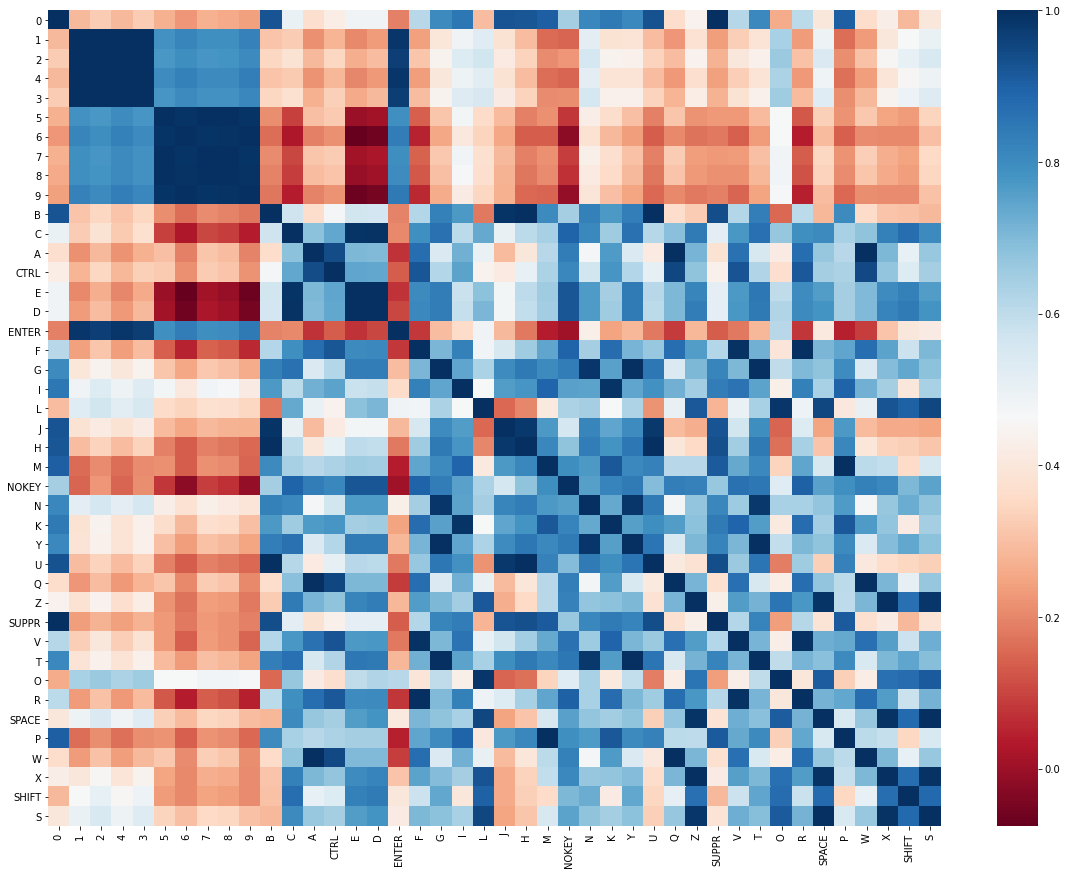

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_mat, cmap="RdBu", xticklabels=dictio.keys(), yticklabels=dictio.keys())